<a href="https://colab.research.google.com/github/Fragoa/Regularizing-Neural-Networks/blob/main/Regularizing_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Peprocessing

In [32]:
# Load full MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

x_all = np.concatenate([x_train_full, x_test])
y_all = np.concatenate([y_train_full, y_test])

# Normalize pixel values to [0, 1]
x_all = x_all.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [33]:
# Select ~5% of the total data for training + validation
x_half, _, y_half, _ = train_test_split(x_all, y_all, test_size=0.5, random_state=42)

# Split tiny set into training and validation sets (80/20 split)
x_train, x_val, y_train, y_val = train_test_split(x_tiny, y_tiny, test_size=0.2, random_state=42)

# Reshape inputs to (batch_size, 784) for dense layers
x_train = x_train.reshape(-1, 784)
x_val   = x_val.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

# Training Models

## **M1**

In [37]:
def build_model_M1():
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(784,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [38]:
model_M1 = build_model_M1()
history_M1 = model_M1.fit(x_train, y_train,
                          epochs=50,
                          batch_size=32,
                          validation_data=(x_val, y_val),
                          verbose=0)

In [39]:
# Extract metrics
train_acc_M1 = history_M1.history['accuracy'][-1]
val_acc_M1 = history_M1.history['val_accuracy'][-1]
train_loss_M1 = history_M1.history['loss'][-1]
val_loss_M1 = history_M1.history['val_loss'][-1]

# Evaluate on test set
test_loss_M1, test_acc_M1 = model_M1.evaluate(x_test, y_test, verbose=0)

# Print results
print("\n M1 (No Regularization) Results:")
print(f"   - Train Accuracy:       {train_acc_M1:.4f}")
print(f"   - Train Loss:           {train_loss_M1:.4f}")
print(f"   - Validation Accuracy:  {val_acc_M1:.4f}")
print(f"   - Validation Loss:      {val_loss_M1:.4f}")
print(f"   - Test Accuracy:        {test_acc_M1:.4f}")
print(f"   - Test Loss:            {test_loss_M1:.4f}")

# Overfitting check
if train_acc_M1 - val_acc_M1 > 0.05:
    print(" Likely overfitting detected.")
else:
    print(" No significant overfitting.")


 M1 (No Regularization) Results:
   - Train Accuracy:       0.9921
   - Train Loss:           0.0434
   - Validation Accuracy:  0.8886
   - Validation Loss:      0.4556
   - Test Accuracy:        0.8887
   - Test Loss:            0.5270
 Likely overfitting detected.


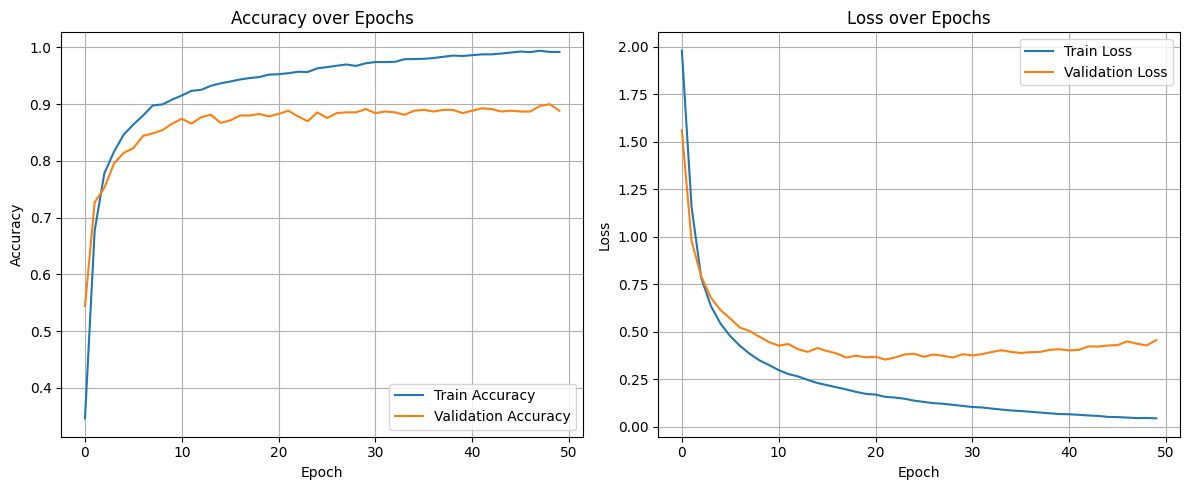

In [40]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_M1.history['accuracy'], label='Train Accuracy')
plt.plot(history_M1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_M1.history['loss'], label='Train Loss')
plt.plot(history_M1.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## **M1-L1**

In [41]:
def build_model_M1_L1(l1_lambda):
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(784,),
                     kernel_regularizer=regularizers.l1(l1_lambda)),
        layers.Dense(16, activation='relu',
                     kernel_regularizer=regularizers.l1(l1_lambda)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
lambda_val = 1e-7
model_M1_L1 = build_model_M1_L1(lambda_val)
history_M1_L1 = model_M1_L1.fit(x_train, y_train,
                                epochs=50,
                                batch_size=32,
                                validation_data=(x_val, y_val),
                                verbose=0)


In [43]:
# Evaluate on test set
test_loss, test_acc = model_M1_L1.evaluate(x_test, y_test, verbose=0)

# Extract final metrics
train_acc = history_M1_L1.history['accuracy'][-1]
val_acc = history_M1_L1.history['val_accuracy'][-1]
train_loss = history_M1_L1.history['loss'][-1]
val_loss = history_M1_L1.history['val_loss'][-1]

# Print results
print(f"\n Final Results of M1-L1 (λ = {lambda_val}):")
print(f"   - Train Accuracy:       {train_acc:.4f}")
print(f"   - Train Loss:           {train_loss:.4f}")
print(f"   - Validation Accuracy:  {val_acc:.4f}")
print(f"   - Validation Loss:      {val_loss:.4f}")
print(f"   - Test Accuracy:        {test_acc:.4f}")
print(f"   - Test Loss:            {test_loss:.4f}")

# Overfitting check
if train_acc - val_acc > 0.05:
    print(" Overfitting is likely present.")
else:
    print("\ No significant overfitting.")



 Final Results of M1-L1 (λ = 1e-07):
   - Train Accuracy:       0.9896
   - Train Loss:           0.0507
   - Validation Accuracy:  0.8700
   - Validation Loss:      0.5984
   - Test Accuracy:        0.8857
   - Test Loss:            0.5233
 Overfitting is likely present.


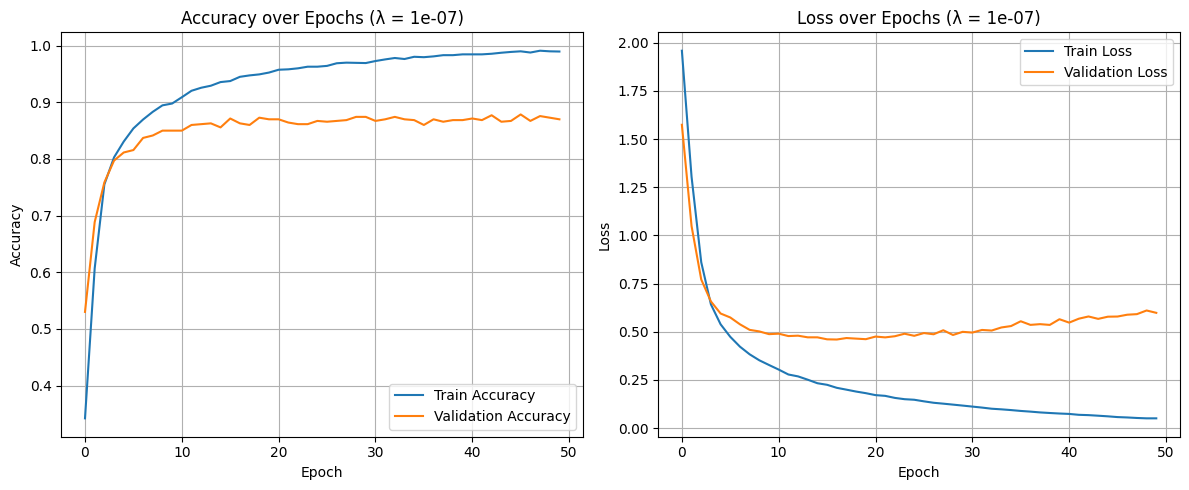

In [44]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_M1_L1.history['accuracy'], label='Train Accuracy')
plt.plot(history_M1_L1.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Accuracy over Epochs (λ = {lambda_val})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_M1_L1.history['loss'], label='Train Loss')
plt.plot(history_M1_L1.history['val_loss'], label='Validation Loss')
plt.title(f'Loss over Epochs (λ = {lambda_val})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [56]:
def train_model_with_l1(lambda_val):
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(784,),
                     kernel_regularizer=regularizers.l1(lambda_val)),
        layers.Dense(16, activation='relu',
                     kernel_regularizer=regularizers.l1(lambda_val)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=15,
                        batch_size=32,
                        validation_data=(x_val, y_val),
                        verbose=0)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    # Extract final metrics
    train_acc = history.history['accuracy'][-1]
    val_acc   = history.history['val_accuracy'][-1]
    val_loss  = history.history['val_loss'][-1]

    return lambda_val, train_acc, val_acc, val_loss, test_loss


In [57]:
lambda_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
results = []
# Grid search
for lmbd in lambda_values:
    result = train_model_with_l1(lmbd)
    results.append(result)

In [58]:
# Print results
print("\n📊 λ Grid Search Results:")
for lmbd, train_acc, val_acc, val_loss, test_loss in results:
    gap = train_acc - val_acc
    print(f"  λ = {lmbd:.0e} | Train Acc = {train_acc:.4f} | Val Acc = {val_acc:.4f} | Gap = {gap:.4f}")

# Sort by best val accuracy with smallest overfitting
results_sorted = sorted(results, key=lambda x: (-x[2], abs(x[1] - x[2])))
best_lambda = results_sorted[0][0]

print(f"\n Optimal λ found: λ_opt = {best_lambda:.0e}")


📊 λ Grid Search Results:
  λ = 1e-06 | Train Acc = 0.9318 | Val Acc = 0.8829 | Gap = 0.0489
  λ = 1e-05 | Train Acc = 0.9336 | Val Acc = 0.8629 | Gap = 0.0707
  λ = 1e-04 | Train Acc = 0.9379 | Val Acc = 0.8857 | Gap = 0.0521
  λ = 1e-03 | Train Acc = 0.9311 | Val Acc = 0.8957 | Gap = 0.0354
  λ = 1e-02 | Train Acc = 0.8443 | Val Acc = 0.8157 | Gap = 0.0286
  λ = 1e-01 | Train Acc = 0.1164 | Val Acc = 0.1157 | Gap = 0.0007

 Optimal λ found: λ_opt = 1e-03


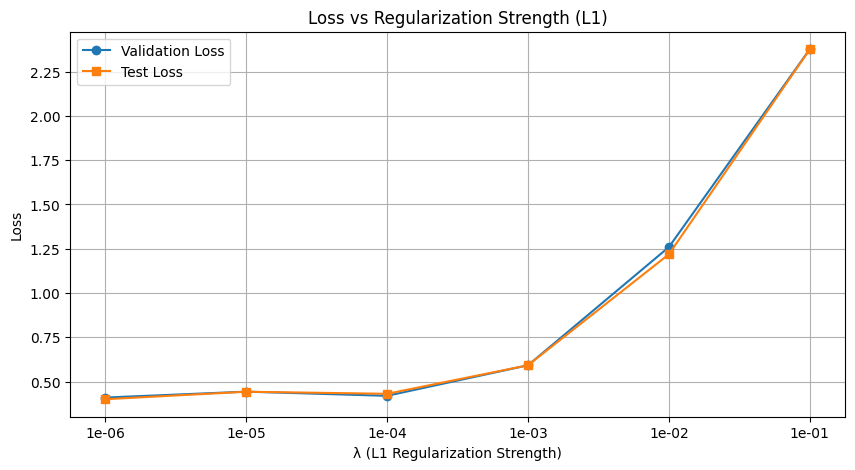

In [59]:
# Plot val/test loss vs lambda (log scale)
lambda_strs = [f"{l:.0e}" for l in lambda_values]
val_losses = [res[3] for res in results]
test_losses = [res[4] for res in results]

plt.figure(figsize=(10, 5))
plt.plot(lambda_strs, val_losses, marker='o', label='Validation Loss')
plt.plot(lambda_strs, test_losses, marker='s', label='Test Loss')
plt.xlabel("λ (L1 Regularization Strength)")
plt.ylabel("Loss")
plt.title("Loss vs Regularization Strength (L1)")
plt.legend()
plt.grid(True)
plt.show()

In [60]:
def train_model_with_l2(lambda_val):
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(784,),
                     kernel_regularizer=regularizers.l2(lambda_val)),
        layers.Dense(12, activation='relu',
                     kernel_regularizer=regularizers.l2(lambda_val)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=15,
                        batch_size=32,
                        validation_data=(x_val, y_val),
                        verbose=0)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    # Extract metrics
    train_acc = history.history['accuracy'][-1]
    val_acc   = history.history['val_accuracy'][-1]
    val_loss  = history.history['val_loss'][-1]

    return lambda_val, train_acc, val_acc, val_loss, test_loss

In [61]:
results_l2 = []
for lmbd in lambda_values:
    results_l2.append(train_model_with_l2(lmbd))

In [62]:
# Print results
print("\n L2 Grid Search Results:")
for lmbd, train_acc, val_acc, val_loss, test_loss in results_l2:
    gap = train_acc - val_acc
    print(f"  λ = {lmbd:.0e} | Train Acc = {train_acc:.4f} | Val Acc = {val_acc:.4f} | Gap = {gap:.4f}")


 L2 Grid Search Results:
  λ = 1e-06 | Train Acc = 0.9636 | Val Acc = 0.8971 | Gap = 0.0664
  λ = 1e-05 | Train Acc = 0.9611 | Val Acc = 0.8729 | Gap = 0.0882
  λ = 1e-04 | Train Acc = 0.9657 | Val Acc = 0.9057 | Gap = 0.0600
  λ = 1e-03 | Train Acc = 0.9614 | Val Acc = 0.8943 | Gap = 0.0671
  λ = 1e-02 | Train Acc = 0.9357 | Val Acc = 0.8929 | Gap = 0.0429
  λ = 1e-01 | Train Acc = 0.7729 | Val Acc = 0.7800 | Gap = -0.0071


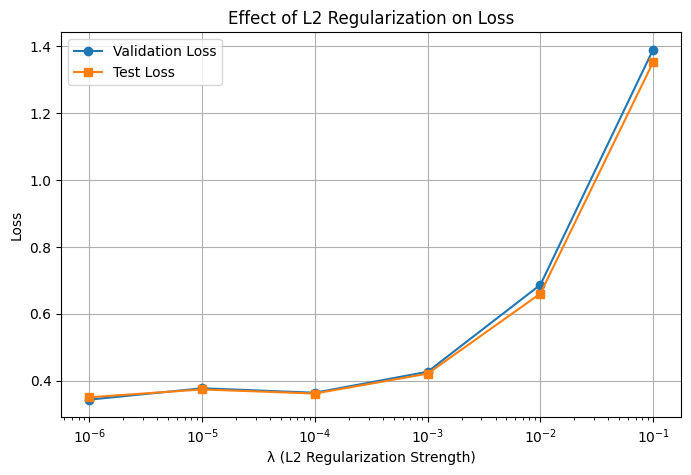

In [63]:
# Plot validation & test loss vs λ
lambdas = [r[0] for r in results_l2]
val_losses = [r[3] for r in results_l2]
test_losses = [r[4] for r in results_l2]

plt.figure(figsize=(8,5))
plt.plot(lambdas, val_losses, marker='o', label='Validation Loss')
plt.plot(lambdas, test_losses, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel('λ (L2 Regularization Strength)')
plt.ylabel('Loss')
plt.title('Effect of L2 Regularization on Loss')
plt.legend()
plt.grid(True)
plt.show()